In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Preprocessing the Data

In [37]:
df = pd.read_csv('input.csv')
print(df)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

In [38]:
df = df.sample(frac=1, random_state=1)
split = int (0.8*len(df))

train_X = df[:split]['Fuel Consumption Comb (mpg)']
train_Y = df[:split]['CO2 Emissions(g/km)']

test_X = df[split:]['Fuel Consumption Comb (mpg)']
test_Y = df[split:]['CO2 Emissions(g/km)']

print(train_X.shape)
print(train_Y.shape)

print(test_X.shape)
print(test_Y.shape)

(5908,)
(5908,)
(1477,)
(1477,)


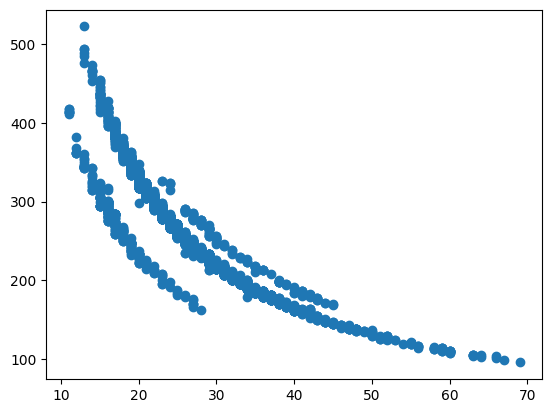

In [39]:
plt.scatter(train_X, train_Y)

Training the Model

In [40]:
def linear_regression(train_X, train_Y):
    n = len(train_X)
    
    numerator = np.sum(train_X * train_Y) - ((np.sum(train_Y) * np.sum(train_X)) / n)
    denominator = np.sum(train_X ** 2) - ((np.sum(train_X) ** 2) / n)
    
    b_1 = numerator / denominator
    
    b_0 = (np.sum(train_Y) / n) - b_1 * (np.sum(train_X) / n)
    
    return b_0, b_1

Evaluate the Model

In [47]:
def mae(X, Y, f):
    total = 0
    for i in range(X.shape[0]):
        total += abs(f(X[i]) - Y[i])
        
    return total / X.shape[0]

Original Data

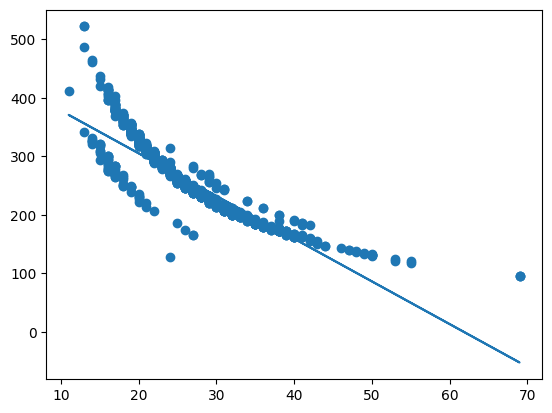

In [49]:
b_0, b_1 = linear_regression(train_X, train_Y)
f = lambda x: b_1 * x + b_0

plt.plot(test_X, f(test_X))
plt.scatter(test_X, test_Y)

Normalize Data

In [43]:
norm_train_X = (train_X - np.min(train_X)) / (np.max(train_X) - np.min(train_X))
norm_train_Y = (train_Y - np.min(train_Y)) / (np.max(train_Y) - np.min(train_Y))

norm_test_X = (test_X - np.min(test_X)) / (np.max(test_X) - np.min(test_X))
norm_test_Y = (test_Y - np.min(train_Y)) / (np.max(train_Y) - np.min(train_Y))

KeyError: 0

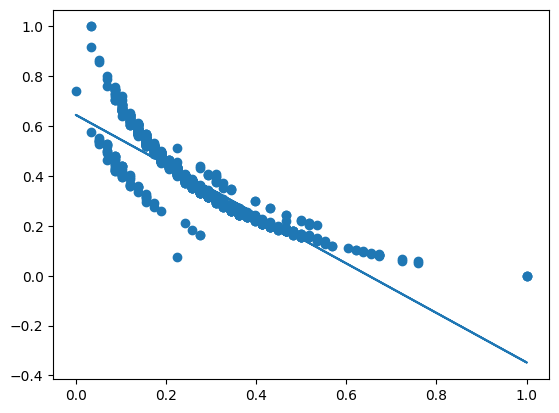

In [46]:
b_0_norm, b_1_norm = linear_regression(norm_train_X, norm_train_Y)
f_norm = lambda x: b_1_norm * x + b_0_norm

plt.plot(norm_test_X, f_norm(norm_test_X))
plt.scatter(norm_test_X, norm_test_Y)

print(mae(norm_test_X, norm_test_X, f_norm))

Standardize Data

In [21]:
std_train_X = (train_X - np.mean(train_X)) / (np.std(train_X))
std_train_Y = (train_Y - np.mean(train_Y)) / (np.std(train_Y))

std_test_X = (test_X - np.mean(test_X)) / (np.std(test_X))
std_test_Y = (test_Y - np.mean(test_Y)) / (np.std(test_Y))

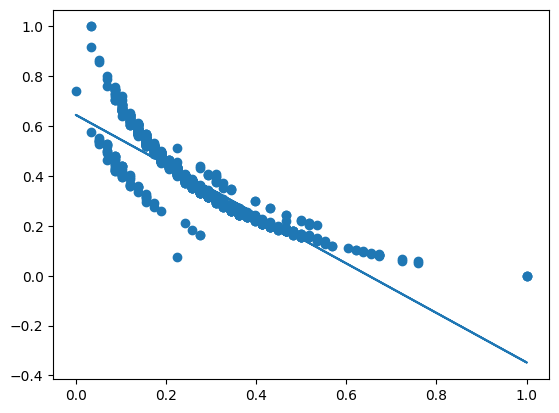

In [24]:
b_0_std, b_1_std = linear_regression(norm_train_X, norm_train_Y)
f_std = lambda x: b_1_std * x + b_0_std

plt.plot(norm_test_X, f_std(norm_test_X))
plt.scatter(norm_test_X, norm_test_Y)